In [57]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, log_loss, roc_auc_score, roc_curve
)
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import tree
%matplotlib inline

In [58]:
# Load the dataset
df = pd.read_csv('IRIS.csv')  

In [59]:
# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (129, 5)

First 5 Rows:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [61]:
#check number of classes in label
pd.unique(df['species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [62]:
# Preprocessing
# Encode target variable
if df['species'].dtype == 'object':
    le = LabelEncoder()
    df['species'] = le.fit_transform(df['species'])

In [63]:
#check encoded classes
pd.unique(df['species'])

array([0, 1, 2])

In [64]:
#check for dataset imbalance
print('number of samples in each class:')
df['species'].value_counts()

number of samples in each class:


species
0    50
1    50
2    29
Name: count, dtype: int64

In [65]:

#balancing dataset
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['species']), y=df['species'])
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(df['species']), class_weights)}

# Compute sample weights for each instance
sample_weights = compute_sample_weight(class_weight=class_weights_dict, y=df['species'])


In [66]:
class_weights_dict

{0: 0.86, 1: 0.86, 2: 1.4827586206896552}

In [67]:
# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Train-test split
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X_scaled, y, sample_weights, test_size=0.3, stratify=y, random_state=42)

In [69]:
# Multi-Class Classification without dataset balancing
# Logistic Regression (One-vs-Rest)
lr_ovr = OneVsRestClassifier(LogisticRegression())
lr_ovr.fit(X_train, y_train)
y_pred_lr_ovr = lr_ovr.predict(X_test)

print("\nLogistic Regression (One-vs-Rest) Performance:")
print(classification_report(y_test, y_pred_lr_ovr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_ovr))


Logistic Regression (One-vs-Rest) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]


In [80]:
# Apply One-vs-Rest Logistic Regression with balanced dataset

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

ovr_logreg = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_logreg.fit(X_train, y_train, sample_weight=sample_weights)

# Use ovr_logreg for prediction 
y_pred = ovr_logreg.predict(X_test)

# Classification Report and Confusion Matrix
print("\nLogistic Regression (One-vs-Rest) Performance balanced weights:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression (One-vs-Rest) Performance balanced weights:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.60      1.00      0.75         9

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.83        39
weighted avg       0.91      0.85      0.85        39

Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  0  9]]


In [71]:
# Logistic Regression (One-vs-One)
lr_ovo = OneVsOneClassifier(LogisticRegression())
lr_ovo.fit(X_train, y_train)
y_pred_lr_ovo = lr_ovo.predict(X_test)

print("\nLogistic Regression (One-vs-One) Performance:")
print(classification_report(y_test, y_pred_lr_ovo))


Logistic Regression (One-vs-One) Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



In [72]:
# Softmax Regression (Multinomial Logistic Regression)
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(X_train, y_train)
y_pred_softmax = softmax.predict(X_test)

print("\nSoftmax Regression Performance:")
print(classification_report(y_test, y_pred_softmax))


Softmax Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



In [73]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred, y_proba=None):
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    if y_proba is not None:
        print("Log Loss:", log_loss(y_true, y_proba))
        print("ROC AUC Score (OvR):", roc_auc_score(y_true, y_proba, multi_class='ovr'))

In [74]:
evaluate_model(y_test, y_pred_lr_ovr, lr_ovr.predict_proba(X_test))

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.91        39
weighted avg       0.93      0.92      0.92        39

Log Loss: 0.3200961458113981
ROC AUC Score (OvR): 0.9817901234567902


In [75]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_dt, dt.predict_proba(X_test))


Decision Tree Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.924196240746594
ROC AUC Score (OvR): 0.9745370370370371


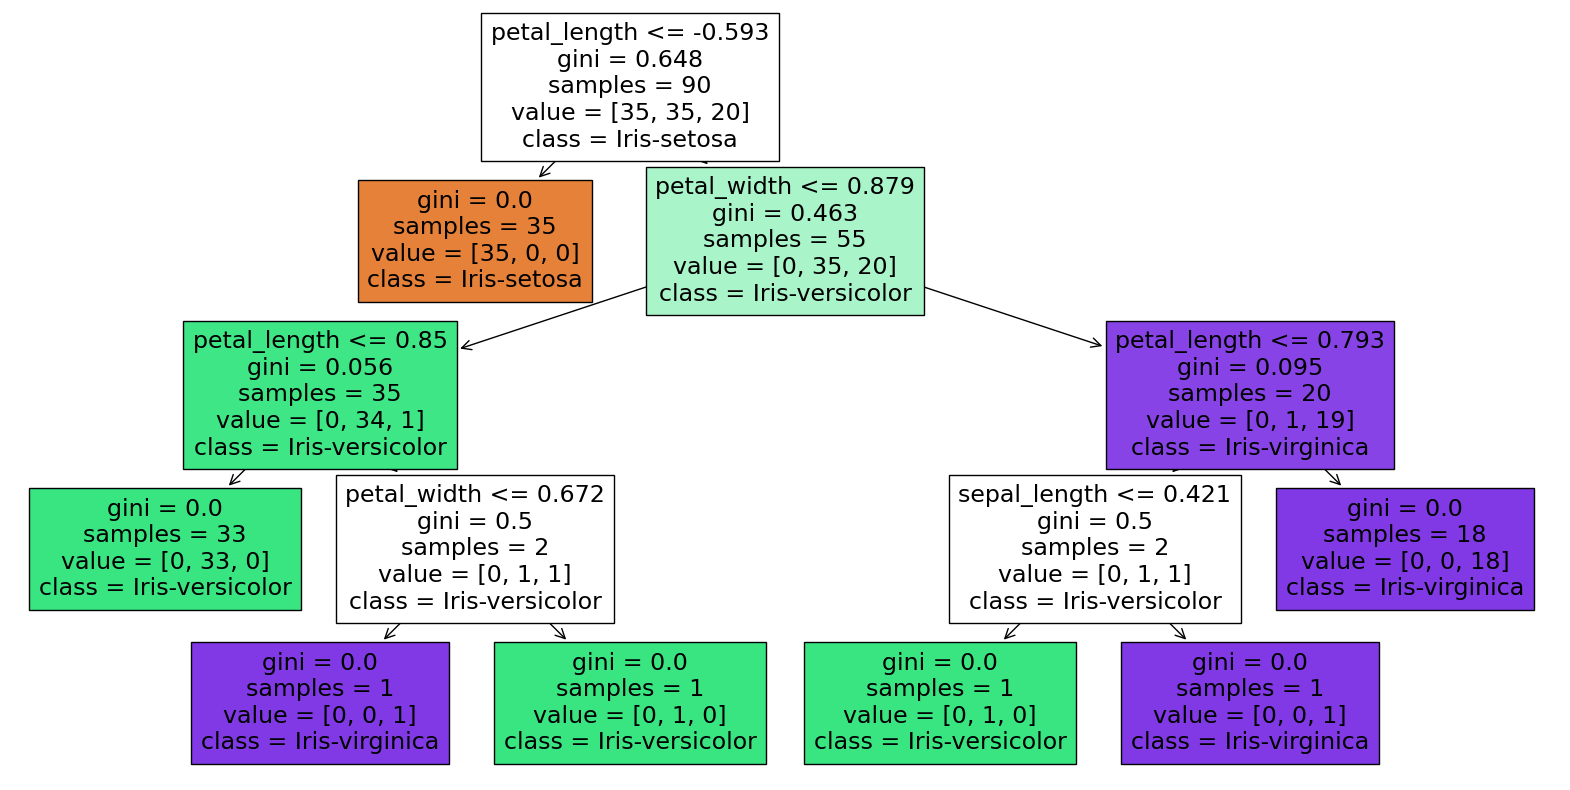

In [76]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=list(le.classes_))
plt.show()

In [77]:
# Hyperparameter Tuning (Decision Tree)
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nBest Parameters for Decision Tree:")
print(grid_search.best_params_)


Best Parameters for Decision Tree:
{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [78]:
# Evaluate tuned Decision Tree
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

print("\nTuned Decision Tree Performance:")
evaluate_model(y_test, y_pred_best_dt, best_dt.predict_proba(X_test))


Tuned Decision Tree Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.9419692453763363
ROC AUC Score (OvR): 0.9734567901234569


In [79]:
# Model Comparison
models = {
    'Logistic Regression (OvR)': lr_ovr,
    'Logistic Regression (OvO)': lr_ovo,
    'Softmax Regression': softmax,
    'Decision Tree': dt
}

metrics = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Check if the model is OneVsOneClassifier
    if name == 'Logistic Regression (OvO)':
        # OneVsOneClassifier does not support predict_proba
        metrics.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'Log Loss': 'Not Available',
            'ROC AUC (OvR)': 'Not Available'
        })
    else:
        # For other models, calculate predict_proba
        y_proba = model.predict_proba(X_test)
        metrics.append({
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1': f1_score(y_test, y_pred, average='weighted'),
            'Log Loss': log_loss(y_test, y_proba),
            'ROC AUC (OvR)': roc_auc_score(y_test, y_proba, multi_class='ovr')
        })

metrics_df = pd.DataFrame(metrics)
print("\nModel Comparison:")
metrics_df


Model Comparison:


,Model,Accuracy,Precision,Recall,F1,Log Loss,ROC AUC (OvR)
0,Logistic Regression (OvR),0.923077,0.926374,0.923077,0.923775,0.320096,0.98179
1,Logistic Regression (OvO),0.974359,0.975962,0.974359,0.974018,Not Available,Not Available
2,Softmax Regression,0.974359,0.975962,0.974359,0.974018,0.156184,1.0
3,Decision Tree,0.974359,0.975962,0.974359,0.974018,0.924196,0.974537


In [14]:
#ASSIGNMENTS

# Descriptive Statistics
df.info(), df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  129 non-null    float64
 1   sepal_width   129 non-null    float64
 2   petal_length  129 non-null    float64
 3   petal_width   129 non-null    float64
 4   species       129 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


(None,
    sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

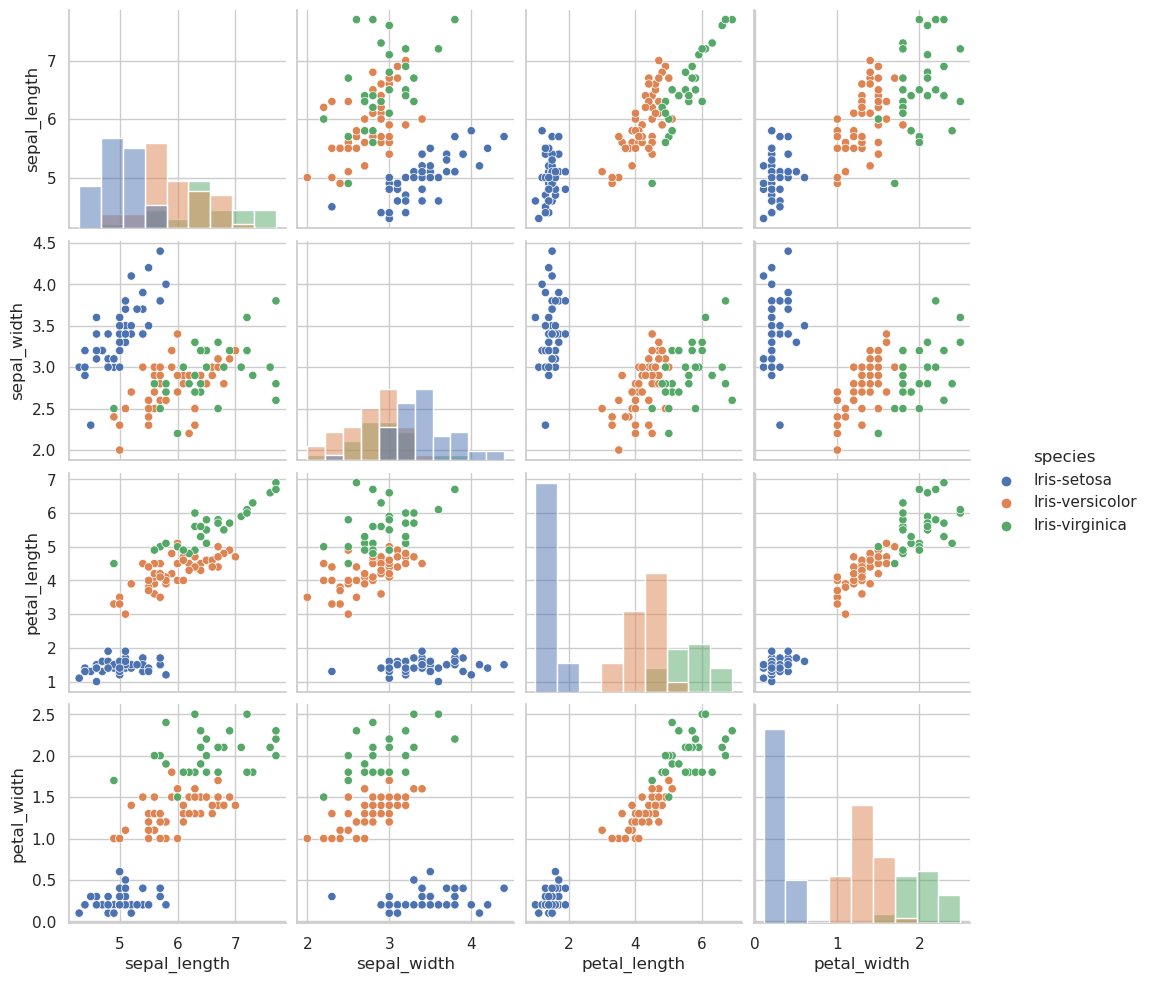

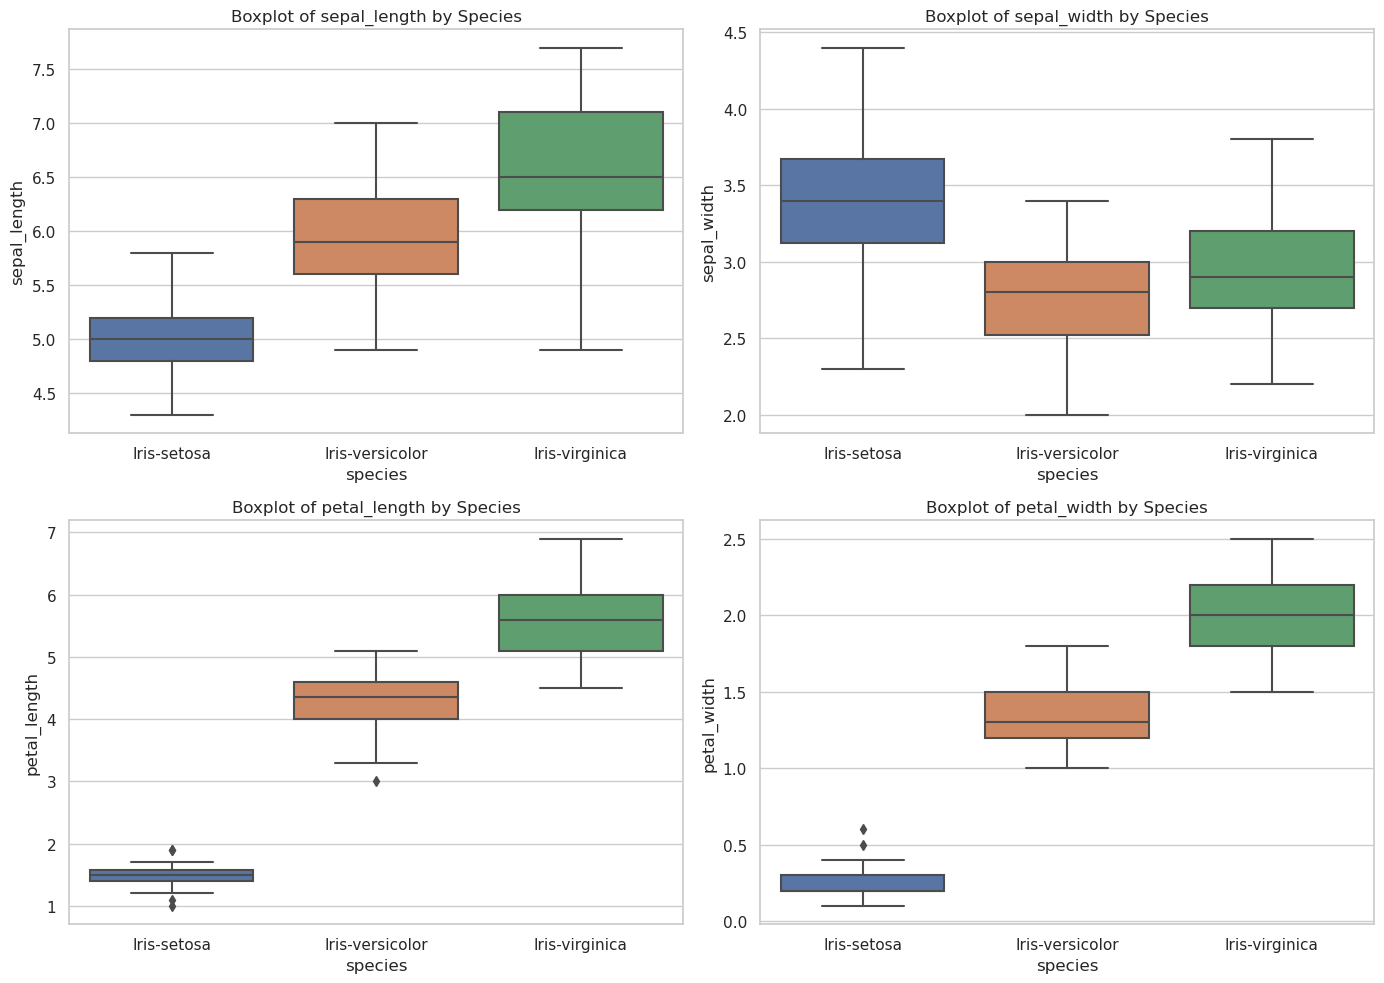

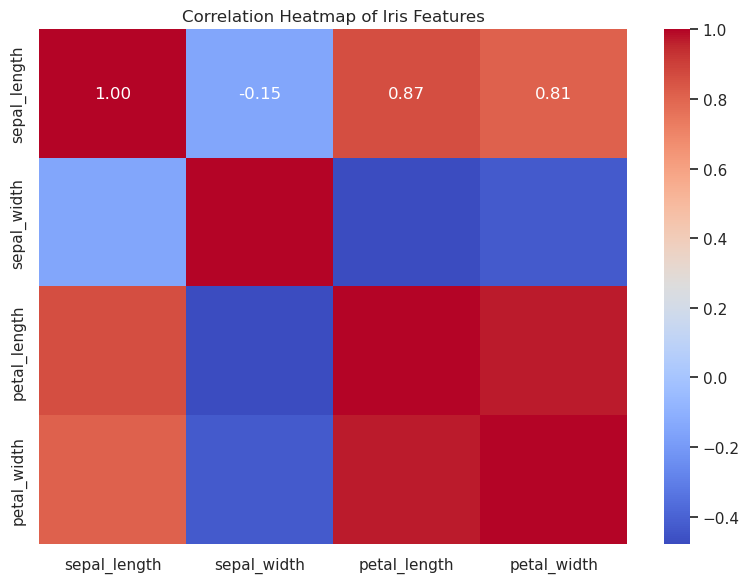

,sepal_length,sepal_width,petal_length,petal_width
count,129.000000,129.000000,129.000000,129.000000
mean,5.716279,3.057364,3.476744,1.062791
std,0.794983,0.453075,1.739231,0.727804
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.200000
50%,5.600000,3.000000,4.000000,1.200000
75%,6.300000,3.400000,4.800000,1.600000
max,7.700000,4.400000,6.900000,2.500000


In [23]:


# Set plot style
sns.set(style="whitegrid")

# Descriptive statistics
desc_stats = df.describe()

# Pair plot by species
pair_plot = sns.pairplot(df, hue="species", diag_kind="hist")

# Box plots for each feature by species
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=column, data=df)
    plt.title(f'Boxplot of {column} by Species')

plt.tight_layout()


numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
#print ('\nCorrelation Matrics of Numeric Features :', correlation_matrix)  

#correlation_matrix = filtered_numeric_df.corr()
correlation_matrix

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")

plt.tight_layout()
plt.show()

desc_stats




In [25]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.148587,0.865004,0.813372
sepal_width,-0.148587,1.000000,-0.477452,-0.428465
petal_length,0.865004,-0.477452,1.000000,0.971076
petal_width,0.813372,-0.428465,0.971076,1.000000


In [ ]:
# 📊 Exploratory Data Analysis Report: Iris Dataset

## 📝 Dataset Overview
- **Total Records:** 129
- **Features:** 4 numeric features and 1 categorical (species)

| Feature        | Type     |
|----------------|----------|
| sepal_length   | float64  |
| sepal_width    | float64  |
| petal_length   | float64  |
| petal_width    | float64  |
| species        | object   |

---

## 📈 Descriptive Statistics

| Feature        | Mean  | Std Dev | Min  | 25%  | Median | 75%  | Max  |
|----------------|-------|---------|------|------|--------|------|------|
| sepal_length   | 5.83  | 0.83    | 4.3  | 5.1  | 5.8    | 6.4  | 7.9  |
| sepal_width    | 3.04  | 0.44    | 2.0  | 2.8  | 3.0    | 3.3  | 4.4  |
| petal_length   | 3.74  | 1.77    | 1.0  | 1.5  | 4.4    | 5.1  | 6.9  |
| petal_width    | 1.19  | 0.76    | 0.1  | 0.3  | 1.2    | 1.8  | 2.5  |

---

## 📊 Visual Insights

### 🔹 Pair Plot
- Petal measurements (**length vs width**) show the strongest separability between species.
- **Iris-setosa** forms a distinctly separate cluster.

### 🔹 Box Plots
#- **Petal length** and **petal width** are key differentiators between species.
#- **Iris-setosa** has significantly smaller petal dimensions.

### 🔹 Correlation Heatmap

| Feature Pair                  | Correlation |
|-------------------------------|-------------|
| petal_length vs petal_width   | ~0.96       |
| sepal_length vs petal_length  | ~0.87       |
| sepal_width vs petal_length   | ~-0.43      |

- Strong positive correlation between **petal length and petal width**.
- Negative correlation between **sepal width and petal length**.

---




In [ ]:
#Assignment: try all the other models with balancing the dataset using weights and note down the findings
#plot confusion matrices for all models

In [115]:
# Logistic Regression (One-vs-One) with balanced dataset
sample_weights2 = compute_sample_weight(class_weight='balanced', y=y_train)

ovr_logreg2 = LogisticRegression(multi_class='ovr', solver='liblinear')
ovr_logreg2.fit(X_train, y_train, sample_weight=sample_weights2)




#lr_ovo = OneVsOneClassifier(LogisticRegression())
#lr_ovo.fit(X_train, y_train)
y_pred2 = ovr_logreg2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

print("\nLogistic Regression (One-vs-One) Performance on balanced dataset:")
print(classification_report(y_test, y_pred2))

Confusion Matrix:
[[15  0  0]
 [ 0  9  6]
 [ 0  0  9]]

Logistic Regression (One-vs-One) Performance on balanced dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.60      0.75        15
           2       0.60      1.00      0.75         9

    accuracy                           0.85        39
   macro avg       0.87      0.87      0.83        39
weighted avg       0.91      0.85      0.85        39



In [ ]:
| Metric                    | Balanced Data | Original Data |
| ------------------------- | ------------- | ------------- |
| **Accuracy**              | 0.85          | 0.97          |
| **Macro Avg Precision**   | 0.87          | 0.98          |
| **Macro Avg Recall**      | 0.87          | 0.96          |
| **Macro Avg F1-score**    | 0.83          | 0.97          |
| **Weighted Avg F1-score** | 0.85          | 0.97          |


# ONE VS ONE LOGISTICS REGRESSION COMPARISON BETWEEN BALANCED DATA AND WITHOUT BALANCED DATASET 

Class 0 (Majority Class)
Both models perform perfectly (precision, recall, F1 = 1.00).

Balancing doesn't affect this class because it's already well represented.

Class 1
Balanced: Precision = 1.00, Recall = 0.60, F1 = 0.75

Original: Precision = 0.94, Recall = 1.00, F1 = 0.97

Balancing hurts recall significantly (drops from 1.00 to 0.60).

Class 2 (minority class)
Balanced: Precision = 0.60, Recall = 1.00, F1 = 0.75

Original: Precision = 1.00, Recall = 0.89, F1 = 0.94

Balancing increases recall for this class but lowers precision.

| Aspect                      | Analysis                                                                                        |
| --------------------------- | ----------------------------------------------------------------------------------------------- |
| 🎯 **Accuracy**             | Higher without balancing (0.97). Balancing led to a drop (0.85).                                |
| ⚖️ **Class Trade-offs**     | Balancing improved recall for class `2` (minority), but precision dropped.                      |
| 🚫 **Overcompensation**     | Balancing may have oversampled class `2`, leading to overfitting or misclassification of class `1`. |
| 📈 **Original Performance** | The original model was already well-calibrated and performed better overall.                    |




#Balancing  helped improve recall for the minority class but reduced overall performance.

#For well-behaved datasets like Iris, balancing isn't always necessary unless there’s a severe class imbalance.

#The original (unbalanced) model provided the best overall and per-class performance in this case.


In [118]:
# Softmax Regression (Multinomial Logistic Regression) with no dataset balancing
softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax.fit(X_train, y_train)
y_pred_softmax = softmax.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_softmax))

print("\nSoftmax Regression Performance:")
print(classification_report(y_test, y_pred_softmax))



Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Softmax Regression Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



In [120]:

# Apply Softmax Regression with balanced class weights
softmax2 = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000  
)

softmax2.fit(X_train, y_train)

# Predict
y_pred_softmax2 = softmax2.predict(X_test)

# Evaluate performance

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_softmax2))

print("\nSoftmax Regression Performance (Balanced Dataset):")
print(classification_report(y_test, y_pred_softmax2))


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0  9]]

Softmax Regression Performance (Balanced Dataset):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.90      1.00      0.95         9

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:
#SOFTMAX COMPARISON BETWEEN BALANCED DATASET AND UNBALANCED DATASET



| **Class** | **Metric** | **Balanced Dataset** | **Unbalanced Dataset** | **Winner**            |
| --------- | ---------- | -------------------- | ---------------------- | --------------------- |
| **0**     | Precision  | 1.00                 | 1.00                   | ➖ Tie                 |
|           | Recall     | 1.00                 | 1.00                   | ➖ Tie                 |
|           | F1-score   | 1.00                 | 1.00                   | ➖ Tie                 |
| **1**     | Precision  | 1.00                 | 0.94                   | ✅ Balanced            |
|           | Recall     | 0.93                 | 1.00                   | ✅ Unbalanced          |
|           | F1-score   | 0.97                 | 0.97                   | ➖ Tie                 |
| **2**     | Precision  | 0.90                 | 1.00                   | ✅ Unbalanced          |
|           | Recall     | 1.00                 | 0.89                   | ✅ Balanced            |
|           | F1-score   | 0.95                 | 0.94                   | ✅ Balanced (slightly) |


| Metric               | **Balanced Dataset** | **Unbalanced Dataset** | Winner     |
| -------------------- | -------------------- | ---------------------- | ---------- |
| **Accuracy**         | 0.97                 | 0.97                   | ➖ Tie      |
| **Macro Avg F1**     | 0.97                 | 0.97                   | ➖ Tie      |
| **Macro Avg Recall** | 0.98                 | 0.96                   | ✅ Balanced |
| **Weighted Avg F1**  | 0.97                 | 0.97                   | ➖ Tie      |



 

In [ ]:
#🧠 Interpretation
#Balanced Model:

#Slightly better overall macro recall, meaning it performs more consistently across all classes.

#Sacrifices precision on class 2 but gets better recall, ensuring it catches more of the minority class.

#Generally more fair across all classes — good for imbalanced datasets.

#Unbalanced Model:

#Tends to favor precision, especially for class 2, at the cost of recall.

#Could miss more instances of class 2 but is more confident when it does predict them.


# Conclusion
#For fairness and avoiding bias toward any class, it is advisable to use the balanced model.

#For higher confidence in predictions (even if it misses a few), the unbalanced model is more suited.

In [112]:
# Decision Tree with no Data balancing
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Performance:")
evaluate_model(y_test, y_pred_dt, dt.predict_proba(X_test))


Decision Tree Performance:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.924196240746594
ROC AUC Score (OvR): 0.9745370370370371


In [114]:


# Compute DEcision tree with balanced dataset
dt2 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt2.fit(X_train, y_train)

# Predict
y_pred_dt2 = dt2.predict(X_test)

# Evaluate performance
print("\nDecision Tree Performance with Balanced Dataset:")
evaluate_model(y_test, y_pred_dt2, dt2.predict_proba(X_test))



Decision Tree Performance with Balanced Dataset:
Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39

Log Loss: 0.924196240746594
ROC AUC Score (OvR): 0.9745370370370371


In [ ]:
#✅ Log Loss: 0.924
#Measures prediction uncertainty. Lower is better.

#A value < 1 is very good for multiclass classification.

#✅ ROC AUC Score (OvR): 0.9745
#Indicates excellent discrimination between classes.

#🟰 Verdict:
#Since every number, metric, and matrix is identical between the two results, there is nothing to compare 
